In [35]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# import XGboost libraries
from xgboost import XGBClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)




In [36]:
features = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/final.csv')

features[:25]

,patdeid,sru_alcohol,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_propoxyphene,sru_methadone,sru_oxycodone,sru_other,t_alcohol,alc_result,urine_test,refuse_reason,urine_temp,supervised,t_Amphetamines,t_Benzodiazapines,t_Methadone,t_Oxycodone,t_Cocaine,t_Methamphetamine,t_Opiate300,t_Cannabinoids,t_Propoxyphene,w_21,w_22,w_23,w_24,c_tests,outcome,c_t,VISIT_0,VISIT_1,VISIT_2,VISIT_3,VISIT_4,VISIT_5,VISIT_6,VISIT_7,VISIT_8,VISIT_9,VISIT_10,VISIT_11,VISIT_12,VISIT_13,VISIT_14,VISIT_15,VISIT_16,VISIT_17,VISIT_18,VISIT_19,VISIT_20,VISIT_21,VISIT_22,VISIT_23,VISIT_24,medication_1.0,medication_2.0,total_dose_1.0,total_dose_2.0,total_dose_4.0,total_dose_5.0,total_dose_6.0,total_dose_7.0,total_dose_8.0,total_dose_10.0,total_dose_12.0,total_dose_13.0,total_dose_14.0,total_dose_15.0,total_dose_16.0,total_dose_17.0,total_dose_18.0,total_dose_19.0,total_dose_20.0,total_dose_21.0,total_dose_22.0,total_dose_24.0,total_dose_25.0,total_dose_26.0,total_dose_27.0,total_dose_28.0,total_dose_29.0,total_dose_30.0,total_dose_31.0,total_dose_32.0,total_dose_33.0,total_dose_34.0,total_dose_35.0,total_dose_36.0,total_dose_37.0,total_dose_38.0,total_dose_39.0,total_dose_40.0,total_dose_41.0,total_dose_42.0,total_dose_43.0,total_dose_44.0,total_dose_45.0,total_dose_46.0,total_dose_47.0,total_dose_48.0,total_dose_49.0,total_dose_50.0,total_dose_51.0,total_dose_52.0,total_dose_53.0,total_dose_55.0,total_dose_56.0,total_dose_57.0,total_dose_58.0,total_dose_59.0,total_dose_60.0,total_dose_61.0,total_dose_62.0,total_dose_63.0,total_dose_64.0,total_dose_65.0,total_dose_66.0,total_dose_67.0,total_dose_68.0,total_dose_69.0,total_dose_70.0,total_dose_71.0,total_dose_72.0,total_dose_73.0,total_dose_75.0,total_dose_76.0,total_dose_77.0,total_dose_78.0,total_dose_79.0,total_dose_80.0,total_dose_81.0,total_dose_82.0,total_dose_83.0,total_dose_84.0,total_dose_85.0,total_dose_86.0,total_dose_87.0,total_dose_88.0,total_dose_89.0,total_dose_90.0,total_dose_91.0,total_dose_92.0,total_dose_93.0,total_dose_94.0,total_dose_95.0,total_dose_96.0,total_dose_97.0,total_dose_98.0,total_dose_99.0,total_dose_100.0,total_dose_102.0,total_dose_104.0,total_dose_105.0,total_dose_106.0,total_dose_107.0,total_dose_108.0,total_dose_109.0,total_dose_110.0,total_dose_111.0,total_dose_113.0,total_dose_115.0,total_dose_116.0,total_dose_118.0,total_dose_120.0,total_dose_123.0,total_dose_124.0,total_dose_125.0,total_dose_127.0,total_dose_129.0,total_dose_130.0,total_dose_131.0,total_dose_132.0,total_dose_133.0,total_dose_135.0,total_dose_140.0,total_dose_144.0,total_dose_145.0,total_dose_150.0,total_dose_153.0,total_dose_155.0,total_dose_160.0,total_dose_165.0,total_dose_170.0,total_dose_175.0,total_dose_180.0,total_dose_185.0,total_dose_190.0,total_dose_195.0,total_dose_200.0,total_dose_205.0,total_dose_210.0,total_dose_215.0,total_dose_225.0,total_dose_230.0,total_dose_235.0,total_dose_240.0,total_dose_245.0,total_dose_250.0,total_dose_255.0,total_dose_265.0,total_dose_270.0,total_dose_300.0,total_dose_360.0,total_dose_390.0,admin_location_1.0,admin_location_2.0
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0

In [37]:
# set X and y
X = features.drop(columns=['outcome'])
y = features['outcome']

In [38]:
# setup train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# fit XGBoost model

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict on test set
y_pred = xgb.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 99.11%


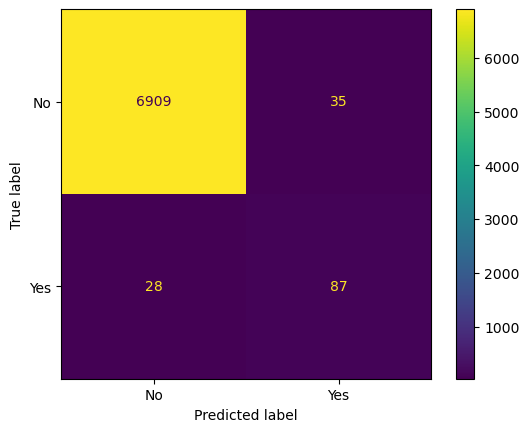

In [40]:
# show confusion matrix display
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot();
